### Setup

In [1]:
import os
import yaml
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

os.chdir("../scripts")

import preprocess, train, inference, interpret

In [2]:
pd.set_option('display.max_rows', 30)

In [3]:
with open("../model/params.yaml", "r") as params_file:
    params = yaml.safe_load(params_file)

data_dir = params['data_dir']

### Load and Prepare the Data

In [7]:
file_name = 'san_francisco.csv'
data = preprocess.load_data(file_name)
data = data.loc[:, ['month_date_yyyymm', 'median_listing_price', 'hotness_score', 'supply_score', 'demand_score']]
data.rename({'month_date_yyyymm': 'Date'}, axis=1, inplace=True)
data['Date'] = data['Date'].astype(str)
data['Date'] = data['Date'] + '01'
data.head(3)

,Date,median_listing_price,hotness_score,supply_score,demand_score
0,20211001,1388000.0,41.476629,78.086536,4.866722
1,20210901,1199000.0,42.425163,82.662209,2.188117
2,20210801,1105750.0,38.637921,73.378749,3.897092


In [19]:
file_name = "BTC-USD.csv"
data = preprocess.load_data(file_name)
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-13,59890.019531,63742.285156,59869.957031,63503.457031,63503.457031,69983454362
1,2021-04-14,63523.753906,64863.097656,61554.796875,63109.695313,63109.695313,77451779687
2,2021-04-15,63075.195313,63821.671875,62208.964844,63314.011719,63314.011719,60954381579


In [8]:
train_df, test_df = preprocess.prep_data(df=data, train_frac=0.8, plot_df=True)

Starting with data preparation...


KeyError: "['Day_Of_Week'] not in index"

In [5]:
train_df.shape, test_df.shape

((2816, 7), (705, 7))

In [11]:
train_df

,demand_score,hotness_score,median_listing_price,supply_score,Day_Of_Week,Month_Of_Year,Quarter_Of_Year
0,0.959264,0.958517,0.069455,0.946690,0.0,0.0,0.0
1,0.970640,0.912845,0.097769,0.828666,0.0,0.0,0.0
2,0.989825,0.995051,0.000000,0.986581,0.0,0.0,0.0
3,0.955584,0.923665,0.005246,0.873615,0.0,0.0,0.0
4,0.874487,0.902739,0.016692,0.938175,0.0,0.0,0.0
5,0.705010,0.733402,0.022342,0.791509,0.0,0.0,0.0
6,0.838257,0.798757,0.085417,0.754869,0.0,0.0,0.0
7,0.978262,0.985106,0.079313,0.980182,0.0,0.0,0.0
8,0.994331,0.950414,0.086074,0.880324,0.0,0.0,0.0
9,0.790387,0.780571,0.024576,0.779898,0.0,0.0,0.0


### Explore the Data

In [26]:
plot_df = pd.read_csv(Path(data_dir, 'plot_df.csv'))
plot_df['Close_Change'] = plot_df.Close.pct_change(1)
plot_df = plot_df.dropna()

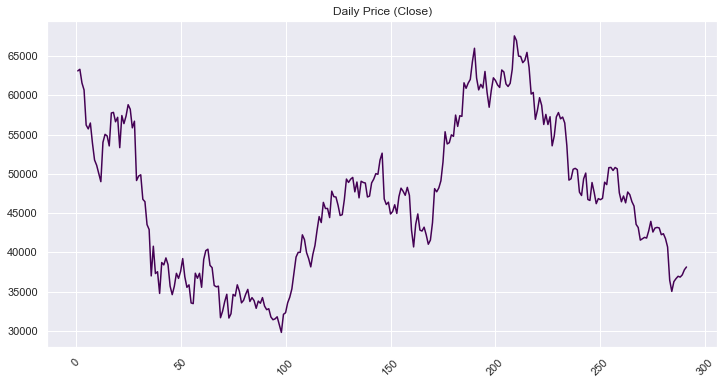

In [27]:
plot_df['Close'].plot(figsize=(12,6), rot=45, cmap='viridis')
plt.title('Daily Price (Close)')
plt.show()

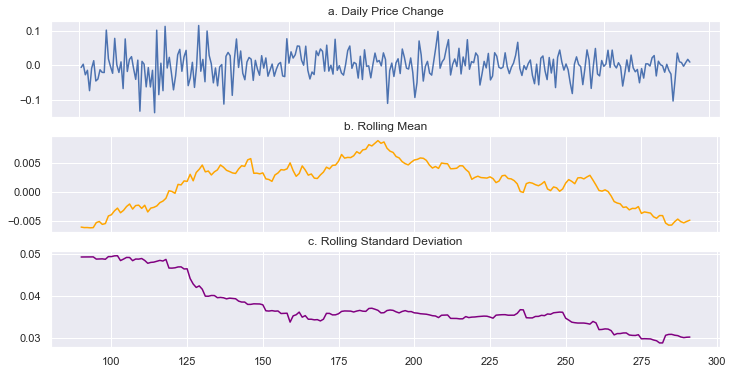

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=1)
plot_df['Close_Change'].plot(ax=axes[0], figsize=(12,6), rot=90, title='a. Daily Price Change', sharex=True)
plot_df['Close_Change'].rolling(90).mean().plot(ax=axes[1], figsize=(12,6), rot=90, title='b. Rolling Mean', color='orange')
plot_df['Close_Change'].rolling(90).std().plot(ax=axes[2], figsize=(12,6), rot=0, title='c. Rolling Standard Deviation', color='purple')
plt.show()

### Train the LSTM model

In [29]:
sequence_length = 30
batch_size = 8
n_epochs = 20
n_epochs_stop = 5
label_name = 'Close'

In [30]:
hist = train.train_model(train_df, test_df, label_name, sequence_length, batch_size, n_epochs, n_epochs_stop)

Starting with model training...
Epoch 1 train loss: 0.0339 test loss: 0.009
Epoch 2 train loss: 0.0988 test loss: 0.0233
Epoch 3 train loss: 0.0839 test loss: 0.0171
Epoch 4 train loss: 0.071 test loss: 0.0094
Epoch 5 train loss: 0.0584 test loss: 0.0055
Epoch 6 train loss: 0.0455 test loss: 0.0166
Epoch 7 train loss: 0.0322 test loss: 0.0082
Epoch 8 train loss: 0.0317 test loss: 0.0285
Epoch 9 train loss: 0.0234 test loss: 0.0169
Early stopping.
Completed.


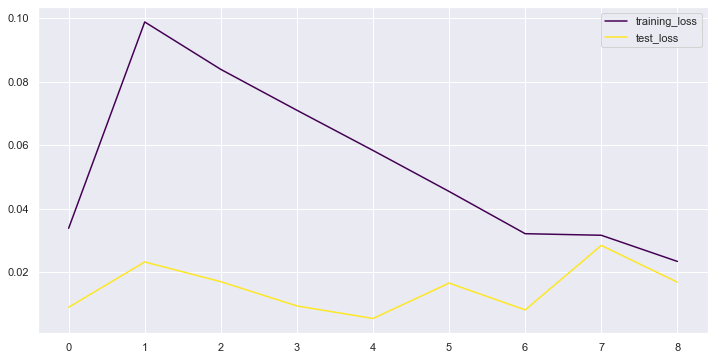

In [31]:
hist.plot(figsize=(12,6), cmap='viridis')
plt.show()

### Evaluate the model

In [23]:
predictions_descaled, labels_descaled = inference.predict(df=test_df,
                                                          label_name='Close',
                                                          sequence_length=sequence_length)

predictions_descaled.shape, predictions_descaled.shape

((881,), (881,))

In [24]:
print('Error on all test data:')
inference.print_loss_metrics(labels_descaled, predictions_descaled)
print('\n')
print('Error on partial test data:')
inference.print_loss_metrics(labels_descaled[:30], predictions_descaled[:30])

Error on all test data:
RMSE:  9452.15
MAE:  6107.52


Error on partial test data:
RMSE:  781.31
MAE:  728.72


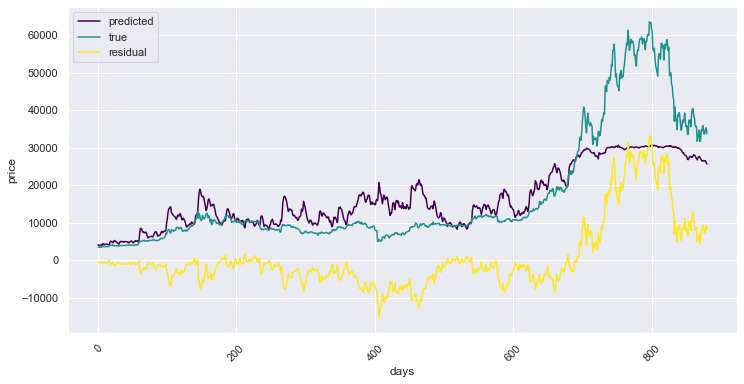

In [25]:
# plot predictions vs true values
df_pred = pd.DataFrame()
df_pred['predicted'] = predictions_descaled
df_pred['true'] = labels_descaled
df_pred['residual'] = labels_descaled - predictions_descaled
df_pred.plot(figsize=(12,6), cmap='viridis')
plt.xticks(rotation=45)
#plt.xlim(0,300)
plt.xlabel('days')
plt.ylabel('price')
plt.legend()
plt.show()

### Find important features

In [ ]:
from train import TimeSeriesDataset, TSModel
from torch.utils.data import DataLoader
import torch
import shap

In [26]:
background_data_size = 900
test_sample_size = 100
sequence_length = 30

In [27]:
shap_values = interpret.get_important_features(
    background_data_size,
    test_sample_size,
    sequence_length
)

Using non-full backward hooks on a Module that does not return a single Tensor or a tuple of Tensors is deprecated and will be removed in future versions. This hook will be missing some of the grad_output. Please use register_full_backward_hook to get the documented behavior.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [28]:
shap_plot = pd.DataFrame(shap_values, columns=train_df.columns.tolist())
shap_plot['days'] = [i-31 for i in list(range(1,31))]
shap_plot.head()

,Close,Volume,High_Low_Pct,Open_Close_Pct,Day_Of_Week,Month_Of_Year,Quarter_Of_Year,days
0,4.536464e-09,1.308553e-09,3.733840e-09,2.277841e-10,5.855153e-09,5.049538e-09,1.111705e-08,-30
1,1.299062e-08,3.230439e-09,7.978107e-09,3.186419e-10,1.103054e-08,1.230902e-08,2.207379e-08,-29
2,2.942053e-08,6.724776e-09,1.539174e-08,3.841993e-10,1.985690e-08,2.498790e-08,4.195253e-08,-28
3,6.048772e-08,1.322252e-08,2.852340e-08,4.409924e-10,3.434911e-08,4.608339e-08,7.675932e-08,-27
4,1.182631e-07,2.511822e-08,5.172206e-08,7.218557e-10,5.741765e-08,8.004698e-08,1.358695e-07,-26


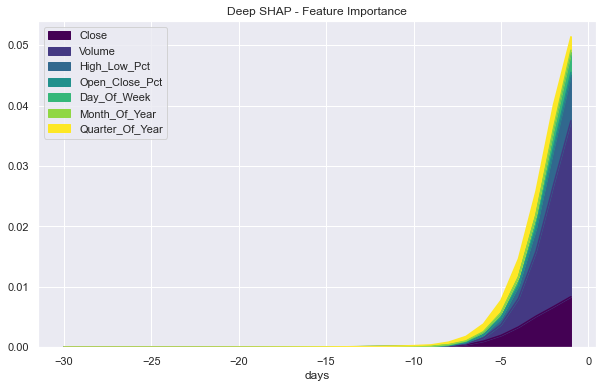

In [29]:
shap_plot.plot.area(x='days',figsize=(10, 6), cmap='viridis')
plt.title("Deep SHAP - Feature Importance")
plt.show()